In [27]:
import gymnasium as gym
import numpy as np
import os

from stable_baselines3 import A2C, PPO, TD3 # these are the algorithms (models) we can use
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecMonitor

from Callbacks import SaveOnBestTrainingRewardCallback

# directory to save the log files in




###   TRAINING UTILS  ###
# Logs will be saved in log_dir/monitor.csv
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

callback = SaveOnBestTrainingRewardCallback(check_freq=5000, log_dir=log_dir)




### ENVIRONMENT ###
# Create and wrap the environment
env_name = "BipedalWalker-v3"

#env = gym.make(env_name)
#env = Monitor(env, log_dir)
#n_actions = env.action_space.shape[-1]

vec_env = make_vec_env(env_name, n_envs=8)
vec_env = VecMonitor(vec_env, log_dir)

### MAKE THE MODEL  ###
model = A2C('MlpPolicy', vec_env, verbose=0,
            ent_coef = 0.0,
            max_grad_norm = 0.5,
            n_steps = 8,
            gae_lambda = 0.9,
            vf_coef = 0.4,
            gamma = 0.99,
            use_rms_prop = True,
            normalize_advantage = False,
            learning_rate = 0.001,
            use_sde = False,
            policy_kwargs = dict(log_std_init=-2, ortho_init=False)
        )


/home/daniel/miniconda3/envs/DRLenv/lib/python3.10/site-packages/stable_baselines3/common/vec_env/vec_monitor.py:44: UserWarning: The environment is already wrapped with a `Monitor` wrapperbut you are wrapping it with a `VecMonitor` wrapper, the `Monitor` statistics will beoverwritten by the `VecMonitor` ones.
  warnings.warn(


In [28]:
### TRAIN
timesteps = 1e6

model.learn(total_timesteps=int(timesteps), callback=callback)

Num timesteps: 40000
Best mean reward: -inf - Last mean reward per episode: -45.52
Saving new best model to tmp/best_model.zip
Num timesteps: 80000
Best mean reward: -45.52 - Last mean reward per episode: -42.73
Saving new best model to tmp/best_model.zip
Num timesteps: 120000
Best mean reward: -42.73 - Last mean reward per episode: -102.32
Num timesteps: 160000
Best mean reward: -42.73 - Last mean reward per episode: -100.70
Num timesteps: 200000
Best mean reward: -42.73 - Last mean reward per episode: -109.53
Num timesteps: 240000
Best mean reward: -42.73 - Last mean reward per episode: -107.34


KeyboardInterrupt: 

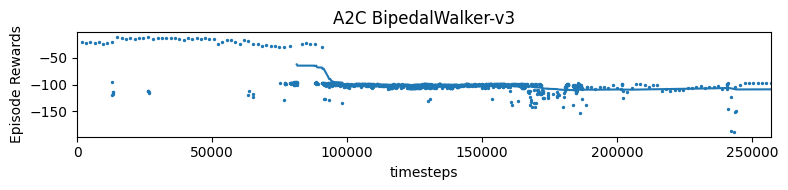

In [29]:
from stable_baselines3.common import results_plotter

plot_title = "A2C " + env_name

# Helper from the library
results_plotter.plot_results(
    [log_dir], timesteps, results_plotter.X_TIMESTEPS, plot_title
)

In [11]:
"""
loadedModel = A2C('MlpPolicy', vec_env, verbose=0,
            ent_coef = 0.0,
            max_grad_norm = 0.5,
            n_steps = 8,
            gae_lambda = 0.9,
            vf_coef = 0.4,
            gamma = 0.99,
            use_rms_prop = True,
            normalize_advantage = False,
            learning_rate = 0.00096,
            use_sde = True,
            policy_kwargs = dict(log_std_init=0.0, ortho_init=False)
        )

loadedModel.load("tmp/best_model.zip")

env = gym.make(env_name)
env.reset()
env = make_vec_env(env_name, n_envs=1)
evaluate_policy(loadedModel, env, n_eval_episodes=50, deterministic=True)
"""

'\nloadedModel = A2C(\'MlpPolicy\', vec_env, verbose=0,\n            ent_coef = 0.0,\n            max_grad_norm = 0.5,\n            n_steps = 8,\n            gae_lambda = 0.9,\n            vf_coef = 0.4,\n            gamma = 0.99,\n            use_rms_prop = True,\n            normalize_advantage = False,\n            learning_rate = 0.00096,\n            use_sde = True,\n            policy_kwargs = dict(log_std_init=0.0, ortho_init=False)\n        )\n\nloadedModel.load("tmp/best_model.zip")\n\nenv = gym.make(env_name)\nenv.reset()\nenv = make_vec_env(env_name, n_envs=1)\nevaluate_policy(loadedModel, env, n_eval_episodes=50, deterministic=True)\n'

In [36]:
import gymnasium as gym
import numpy as np
import os

from stable_baselines3 import A2C, PPO, TD3 # these are the algorithms (models) we can use
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecMonitor

from Callbacks import SaveOnBestTrainingRewardCallback

# directory to save the log files in




###   TRAINING UTILS  ###
# Logs will be saved in log_dir/monitor.csv
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)




### ENVIRONMENT ###
# Create and wrap the environment
env_name = "BipedalWalker-v3"

#env = gym.make(env_name)
#env = Monitor(env, log_dir)
#n_actions = env.action_space.shape[-1]

vec_env = make_vec_env(env_name, n_envs=16)
vec_env = VecMonitor(vec_env, log_dir)

### MAKE THE MODEL  ###
model = PPO('MlpPolicy', vec_env, verbose=0,
            n_steps = 2048,
            batch_size = 64,
            gae_lambda= 0.95,
            gamma= 0.999,
            n_epochs= 10,
            ent_coef= 0.0,
            learning_rate= 3e-4,
            clip_range= 0.18,
        )


/home/daniel/miniconda3/envs/DRLenv/lib/python3.10/site-packages/stable_baselines3/common/vec_env/vec_monitor.py:44: UserWarning: The environment is already wrapped with a `Monitor` wrapperbut you are wrapping it with a `VecMonitor` wrapper, the `Monitor` statistics will beoverwritten by the `VecMonitor` ones.
  warnings.warn(


In [37]:
### TRAIN
timesteps = 3e6

model.learn(total_timesteps=int(timesteps), callback=callback)

Num timesteps: 16000
Best mean reward: -inf - Last mean reward per episode: -112.64
Saving new best model to tmp/best_model.zip
Num timesteps: 32000
Best mean reward: -112.64 - Last mean reward per episode: -112.71
Num timesteps: 48000
Best mean reward: -112.64 - Last mean reward per episode: -113.76
Num timesteps: 64000
Best mean reward: -112.64 - Last mean reward per episode: -111.47
Saving new best model to tmp/best_model.zip
Num timesteps: 80000
Best mean reward: -111.47 - Last mean reward per episode: -111.60
Num timesteps: 96000
Best mean reward: -111.47 - Last mean reward per episode: -108.45
Saving new best model to tmp/best_model.zip
Num timesteps: 112000
Best mean reward: -108.45 - Last mean reward per episode: -108.73
Num timesteps: 128000
Best mean reward: -108.45 - Last mean reward per episode: -109.67
Num timesteps: 144000
Best mean reward: -108.45 - Last mean reward per episode: -109.56
Num timesteps: 160000
Best mean reward: -108.45 - Last mean reward per episode: -110.

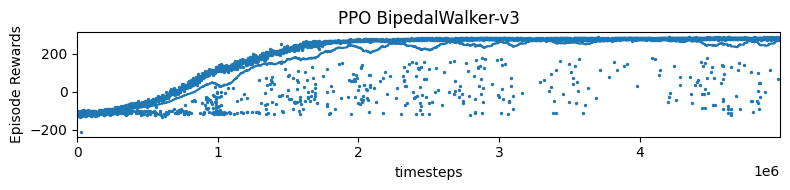

In [38]:
from stable_baselines3.common import results_plotter

plot_title = "PPO " + env_name

# Helper from the library
results_plotter.plot_results(
    [log_dir], timesteps, results_plotter.X_TIMESTEPS, plot_title
    )